```
Saranpat Prasertthum (655667271)
IE598 MLF F18
Module 5 Homework (Dimensionality Reduction)
Use the Treasury Yield Curve dataset
```

In [153]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [150]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.svm import SVR


plt.rcParams["figure.figsize"] = (16,9)

In [2]:
df = pd.read_csv('hw5_treasury yield curve data.csv',parse_dates=['Date'],index_col='Date')
df.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-17,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
2019-05-16,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2019-05-15,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
2019-05-14,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
2019-05-13,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


## Part 1: Exploratory Data Analysis

### Explore datatype of each cols

In [7]:
date_indx = df.index

In [6]:
def get_data_type(x):
    return type(x).__name__

result = df.applymap(get_data_type)

counts = result.apply(pd.value_counts)
counts.fillna(0,inplace=True)
df_melted = df.melt(var_name='columns', value_name='values')

counts = counts.T
counts

,float
SVENF01,8071
SVENF02,8071
SVENF03,8071
SVENF04,8071
SVENF05,8071
SVENF06,8071
SVENF07,8071
SVENF08,8071
SVENF09,8071
SVENF10,8071


### Scatter plot: Pair plot

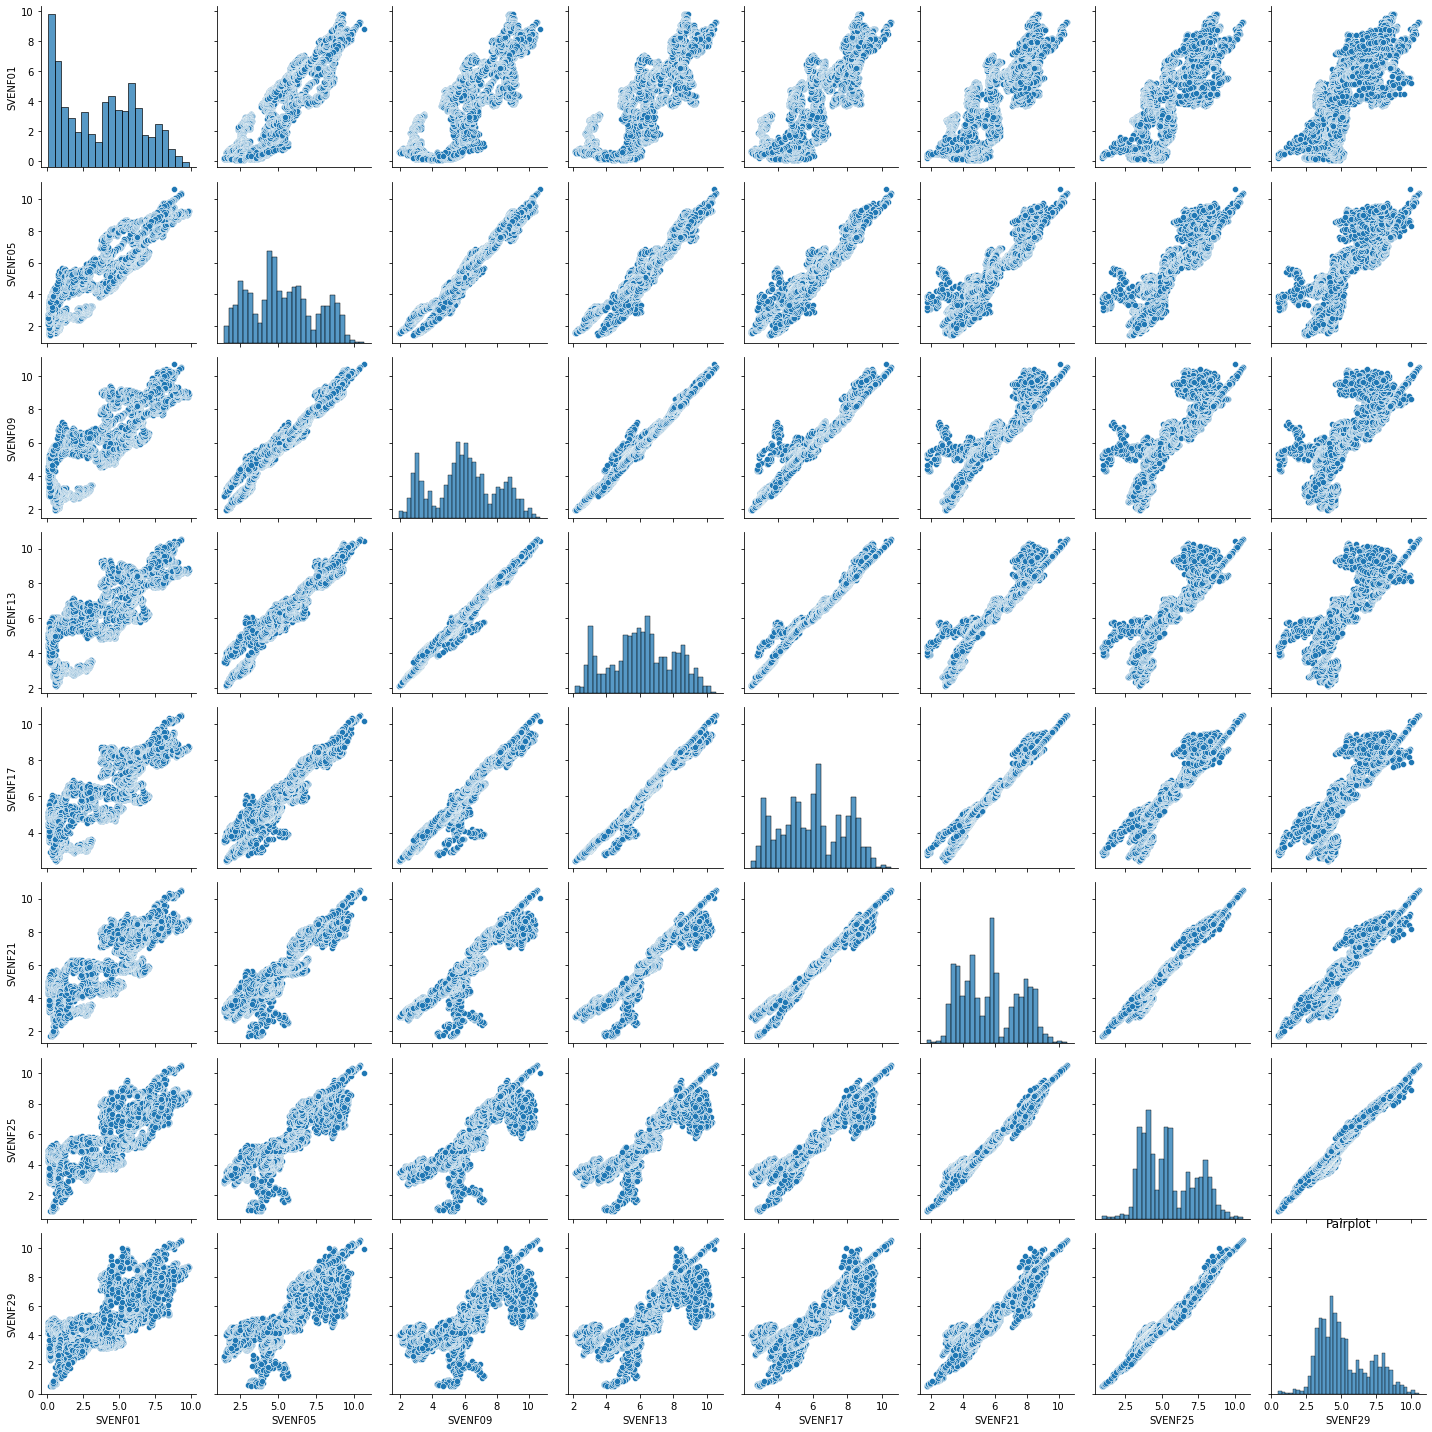

In [37]:
cols = df.columns[[(i%4==0) for i in range(len(df.columns))]] # using mod to pic the cols
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.title("Pairplot")
plt.show()

### Data frame shape

In [20]:
print("Number of Columns :", df.shape[1])
print("Number of Rows :", df.shape[0])

Number of Columns : 31
Number of Rows : 8071


### Statistical Summaries

In [21]:
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


### More Statistical Summaries

In [22]:
num_only_df = df.select_dtypes(include = [np.number]) # can only find the quantile only on numberic columns
def get_n_quantiles(series, n):
    quantiles = [series.quantile(q = i/n) for i in range(1,n+1)] # start at quantile 1 to n
    return pd.Series(quantiles, index=[f"Boundary for {int((i/n)*100)} percentile " for i in range(1, n+1)])

result = num_only_df.apply(lambda x: get_n_quantiles(x,10),axis=0) #using 10 equal quantiles
result 

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
Boundary for 10 percentile,0.3326,1.0690,1.7507,2.2505,2.5029,2.7015,2.8794,2.9812,3.0604,3.0999,...,3.4749,3.4791,3.4734,3.4643,3.4303,3.3828,3.3142,3.2413,3.1550,2.942279
Boundary for 20 percentile,0.8002,1.5791,2.2666,2.7630,3.0774,3.2498,3.4406,3.6974,3.9060,4.0841,...,3.8569,3.8655,3.8607,3.8485,3.7735,3.7280,3.6895,3.6468,3.6141,3.065856
Boundary for 30 percentile,1.5379,2.2918,2.9355,3.6452,4.1877,4.5532,4.8027,4.9952,5.1234,5.2053,...,4.3886,4.2992,4.2082,4.1288,4.0831,4.0917,4.0959,4.0735,4.0453,3.221309
Boundary for 40 percentile,2.6503,3.1340,3.7994,4.2409,4.6082,4.9288,5.2072,5.4237,5.5719,5.6788,...,4.7922,4.7018,4.6413,4.5980,4.5432,4.5070,4.4576,4.4189,4.3729,3.698696
Boundary for 50 percentile,3.9865,4.3933,4.5055,4.7189,5.0513,5.3946,5.6637,5.8708,5.9937,6.0824,...,5.6196,5.5030,5.3699,5.2280,5.0967,4.9797,4.8608,4.7586,4.6690,4.956219
Boundary for 60 percentile,4.7050,5.0117,5.4079,5.6254,5.8145,5.9761,6.1366,6.2761,6.3895,6.4659,...,5.8656,5.7615,5.6658,5.5801,5.4978,5.4157,5.3246,5.2178,5.1167,5.508572
Boundary for 70 percentile,5.6197,5.8859,6.0442,6.2370,6.4225,6.5767,6.7085,6.8425,6.9502,7.0489,...,6.9845,6.8699,6.7596,6.6282,6.4863,6.3394,6.1964,6.0526,5.9077,7.218207
Boundary for 80 percentile,6.2687,6.6430,6.9640,7.3057,7.5645,7.7646,7.8642,7.9269,7.9859,8.0284,...,7.6794,7.6066,7.5385,7.4820,7.4269,7.3752,7.3031,7.2289,7.1568,8.807179
Boundary for 90 percentile,7.5553,7.8737,8.1212,8.3588,8.5194,8.6279,8.7289,8.7915,8.8080,8.8040,...,8.2496,8.2084,8.1593,8.1223,8.1024,8.0811,8.0568,8.0432,8.0297,9.363296
Boundary for 100 percentile,9.8138,9.8878,10.1456,10.4599,10.6499,10.7414,10.7663,10.7475,10.7015,10.6400,...,10.5351,10.5351,10.5351,10.5351,10.5351,10.5351,10.5351,10.5351,10.5351,10.150118


### Q-Q plot
showing if the data is gaussian

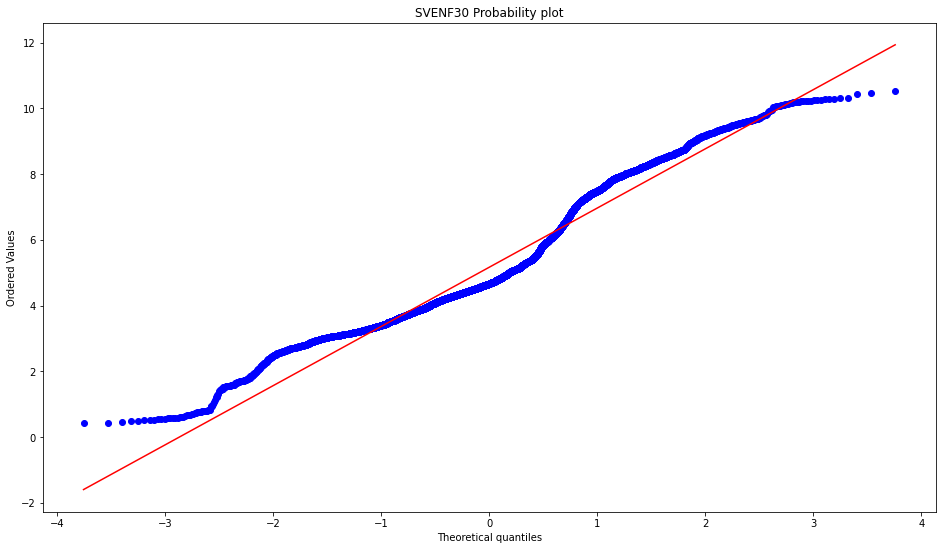

SVENF30 does not look Gaussian (reject H0)


c:\Users\SARAN\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [36]:
def p_test(p,alpha):
    if p > alpha:
        print("SVENF30 looks Gaussian (fail to reject H0)")
    else:
        print("SVENF30 does not look Gaussian (reject H0)")

stats.probplot(df['SVENF30'],dist='norm',plot=plt)
plt.title("SVENF30 Probability plot")
plt.show()
#using shapiro test for normal
stat, p = stats.shapiro(df['SVENF30'])
p_test(p,0.5)


### Ploting SVENF10

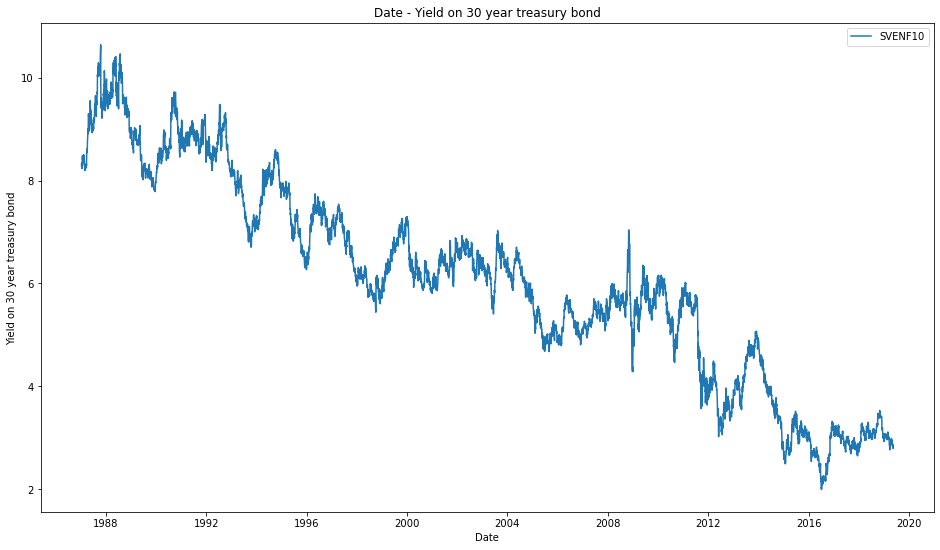

In [34]:
plt.plot(df['SVENF10'], label = "SVENF10")
plt.xlabel("Date")
plt.ylabel("Yield on 30 year treasury bond")
plt.title("Date - Yield on 30 year treasury bond")
plt.legend()
plt.show()

### Cross ploting SVENF10 - AdjClose

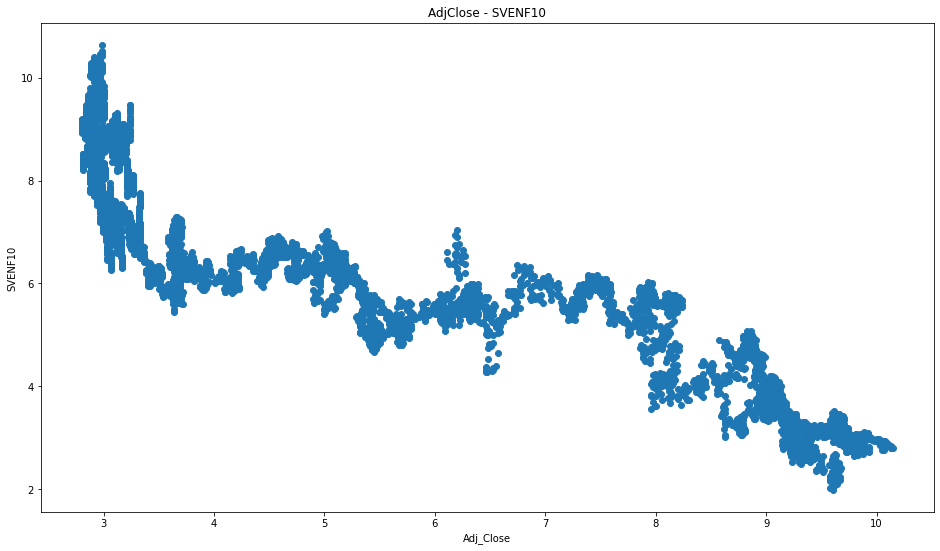

In [44]:
plt.scatter(df['Adj_Close'],df['SVENF10'])
plt.xlabel("Adj_Close")
plt.ylabel("SVENF10")
plt.title("AdjClose - SVENF10")
plt.show()

### Heat map plot

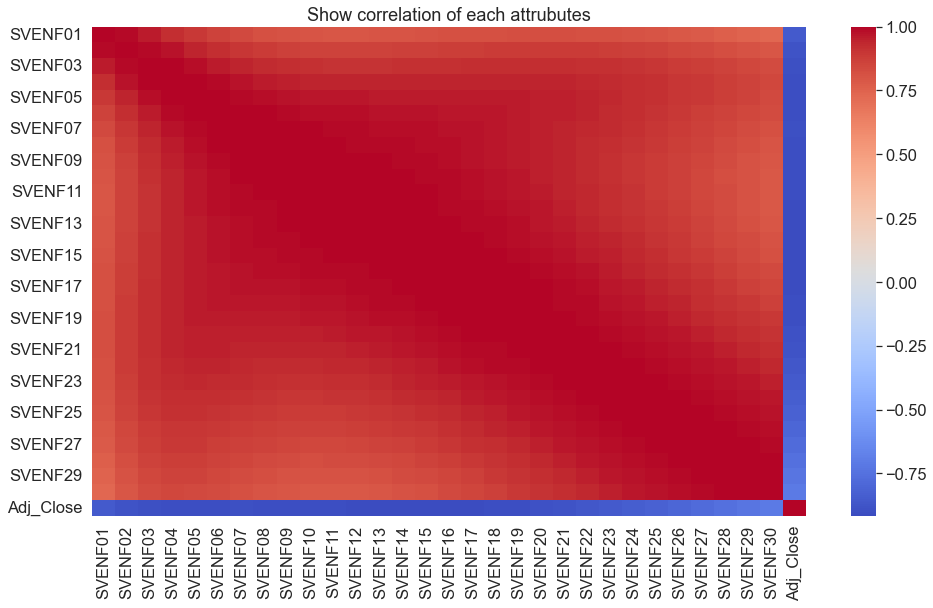

In [56]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Show correlation of each attrubutes")
plt.show()

### Create train test set

In [64]:
X, y = df.drop("Adj_Close",axis = 1), df['Adj_Close']
X.shape

(8071, 30)

## Part 2: Perform a PCA on the Treasury Yield dataset
Expained variences on all components

In [75]:
pca = PCA(n_components=X.shape[1])
pca.fit_transform(X)
all_component_exp_var = pca.explained_variance_ratio_
print("Explained Var Ratio with all component: \n", all_component_exp_var)
print()
print("Culmulative Var Ratio with all component: \n", all_component_exp_var.cumsum())
print()
print('-------------------------------------------------------------------')
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
three_component_exp_var = pca.explained_variance_ratio_
print("Explained Var Ratio with 3 component: \n", three_component_exp_var)
print()
print("Culmulative Var Ratio with 3 component: \n", three_component_exp_var.cumsum())
print()

Explained Var Ratio with all component: 
 [9.25027254e-01 3.77198563e-02 3.11962115e-02 5.11829721e-03
 8.45006479e-04 8.14071111e-05 1.06386900e-05 1.23073879e-06
 8.99497477e-08 7.14094977e-09 4.89071592e-10 3.83422436e-11
 8.63162713e-12 7.54060102e-12 7.44722038e-12 7.41409677e-12
 7.37633844e-12 7.36922042e-12 7.21033060e-12 7.16011018e-12
 7.08499808e-12 7.01615861e-12 6.97953948e-12 6.83297854e-12
 6.78790385e-12 6.76011093e-12 6.68796631e-12 6.63106214e-12
 6.57322725e-12 6.42225375e-12]

Culmulative Var Ratio with all component: 
 [0.92502725 0.96274711 0.99394332 0.99906162 0.99990663 0.99998803
 0.99999867 0.9999999  0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]

-------------------------------------------------------------------
Explained Var Ratio with 3 component: 
 [0.92502725 0.03771986 0.03119621

#### Plot Explained - Principle 
PCA on :All components

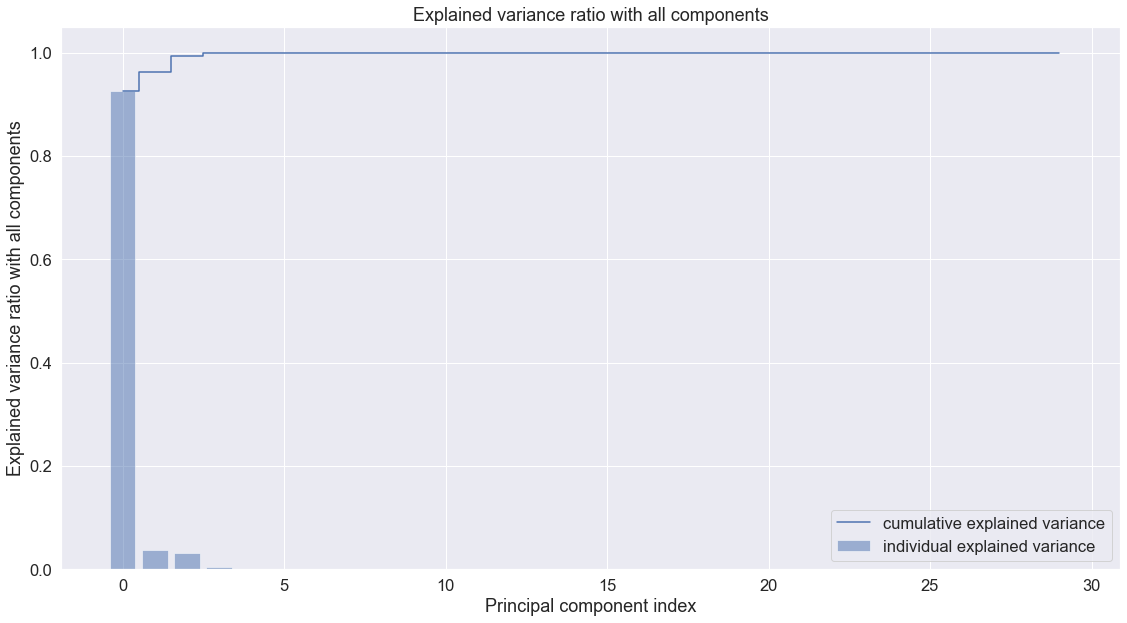

In [77]:
plt.bar( np.arange(X.shape[1]),all_component_exp_var, alpha=0.5, align='center', label='individual explained variance')
plt.step( np.arange(X.shape[1]),all_component_exp_var.cumsum(), where='mid',label='cumulative explained variance')
plt.title('Explained variance ratio with all components')
plt.ylabel('Explained variance ratio with all components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

PCA on :3 components

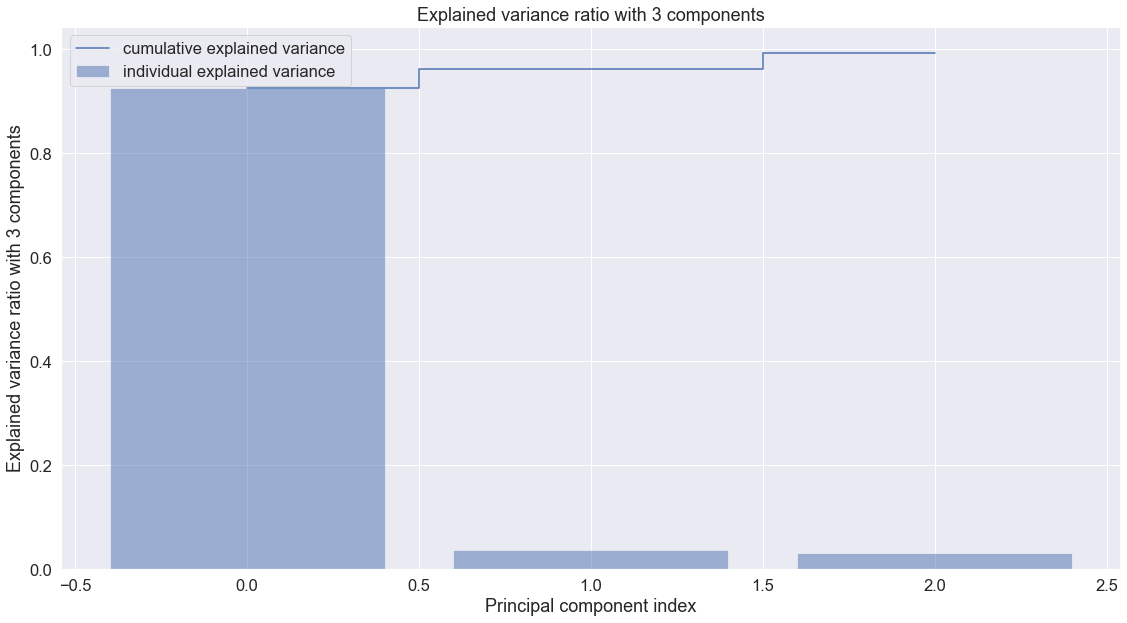

In [79]:
plt.bar( np.arange(3),three_component_exp_var, alpha=0.5, align='center', label='individual explained variance')
plt.step( np.arange(3),three_component_exp_var.cumsum(), where='mid',label='cumulative explained variance')
plt.title('Explained variance ratio with 3 components')
plt.ylabel('Explained variance ratio with 3 components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Part 3: Linear regression v. SVM regressor - baseline
create function to train

In [116]:
y

Date
1987-01-13     2.942279
1987-01-14     2.942279
1987-01-15     2.942279
1987-01-16     2.942279
1987-01-20     2.942279
                ...    
2019-05-13    10.130177
2019-05-14    10.130177
2019-05-15    10.150118
2019-05-16    10.130177
2019-05-17    10.130177
Name: Adj_Close, Length: 8071, dtype: float64

In [144]:
def train_LR_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # LinearRegression
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    # convert y_pred to series
    y_pred = pd.Series(y_pred,index = y_test.index)
    y_test = y_test.sort_index()
    y_pred = y_pred.sort_index()

    residuals = y_test- y_pred

    # plot the prediction
    plt.plot(y_test,label = "actual")
    plt.plot(y_pred,label = "predict")
    plt.legend()
    plt.title("Adj Clos Linear Regression - Predition")
    plt.show()

    #plot residule
    plt.scatter(y_test.index,residuals,label = 'predict')
    tmp_line = pd.Series(np.zeros_like(y_pred),index = y_test.index)
    plt.plot(tmp_line,c='r',label = 'actual')
    plt.legend()
    plt.title("Adj Close Linear Regression Prediction Residual Plot")
    plt.show()
    mse = mean_squared_error(y_test, y_pred)
    print("RootMean Squared Error:", np.sqrt(mse))
    print("R-score: ", r2_score(y_test,y_pred))


 

### Linear Regression w/ PCA

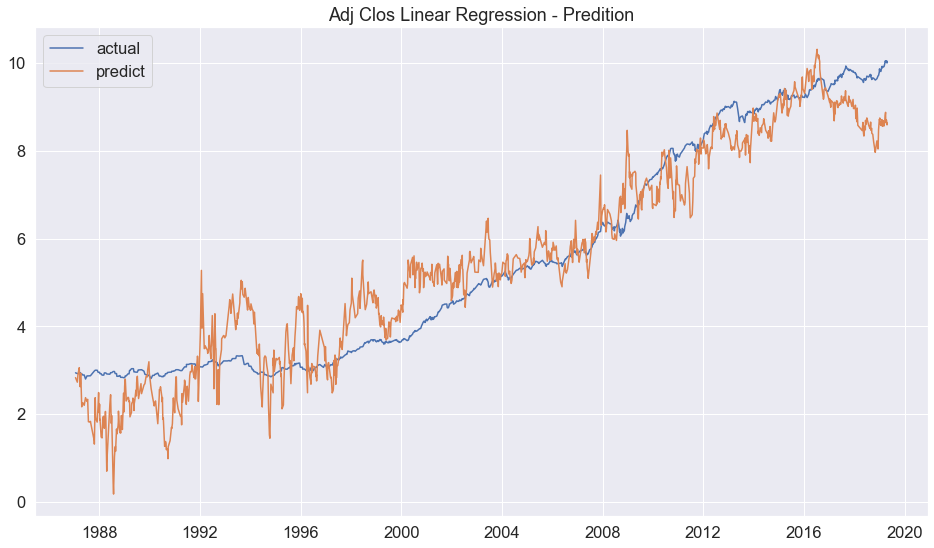

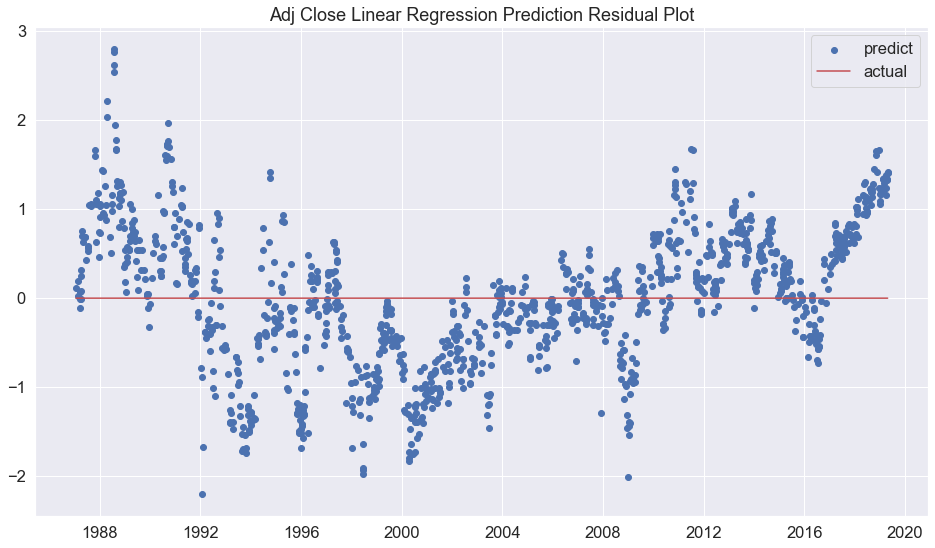

Mean Squared Error: 0.6121021683244461
R-score:  0.9041309535337267


In [145]:
train_LR_model(X,y)

### Linear Regression w PCA

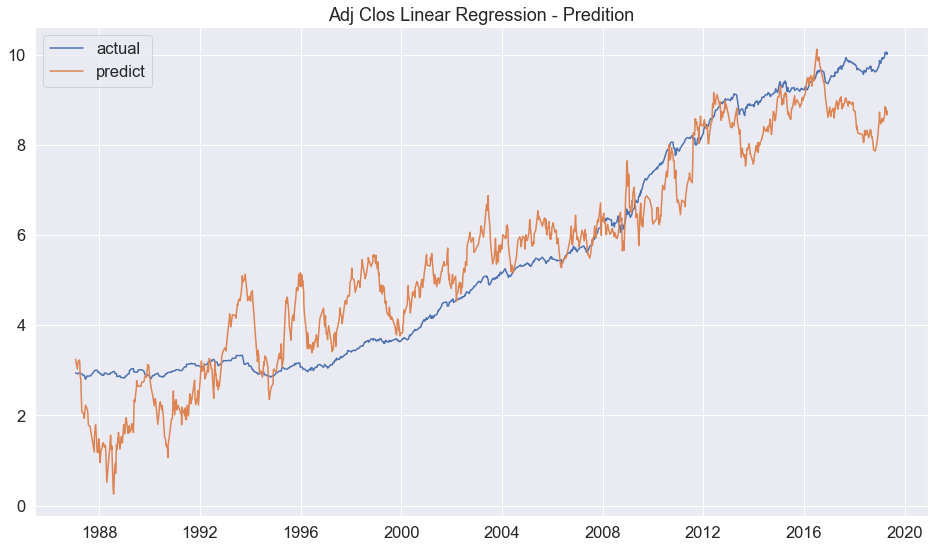

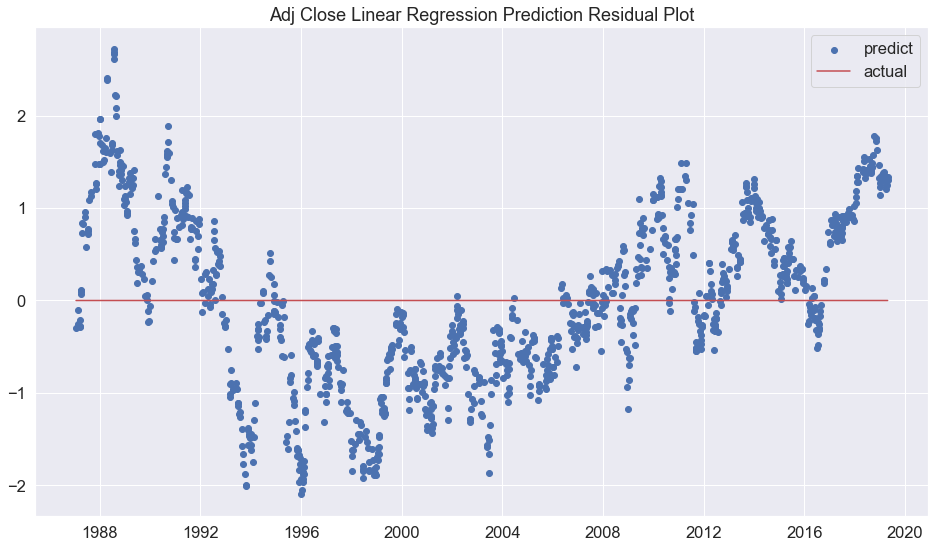

Mean Squared Error: 0.8531436987851337
R-score:  0.86637839704909


In [146]:
train_LR_model(X_pca,y)

#### Using SVM

In [148]:
def train_SVM_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # SVM
    reg = SVR(kernel='linear')
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    # convert y_pred to series
    y_pred = pd.Series(y_pred,index = y_test.index)
    y_test = y_test.sort_index()
    y_pred = y_pred.sort_index()

    residuals = y_test- y_pred

    # plot the prediction
    plt.plot(y_test,label = "actual")
    plt.plot(y_pred,label = "predict")
    plt.legend()
    plt.title("Adj Clos Linear Regression - Predition")
    plt.show()

    #plot residule
    plt.scatter(y_test.index,residuals,label = 'predict')
    tmp_line = pd.Series(np.zeros_like(y_pred),index = y_test.index)
    plt.plot(tmp_line,c='r',label = 'actual')
    plt.legend()
    plt.title("Adj Close Linear Regression Prediction Residual Plot")
    plt.show()
    mse = mean_squared_error(y_test, y_pred)
    print("RootMean Squared Error:", np.sqrt(mse))
    print("R-score: ", r2_score(y_test,y_pred))

### SVM w/ PCA

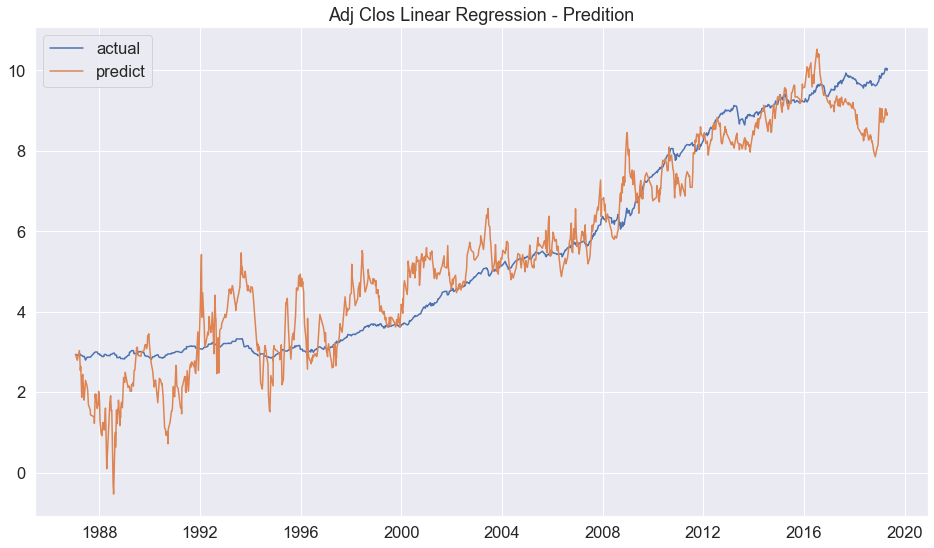

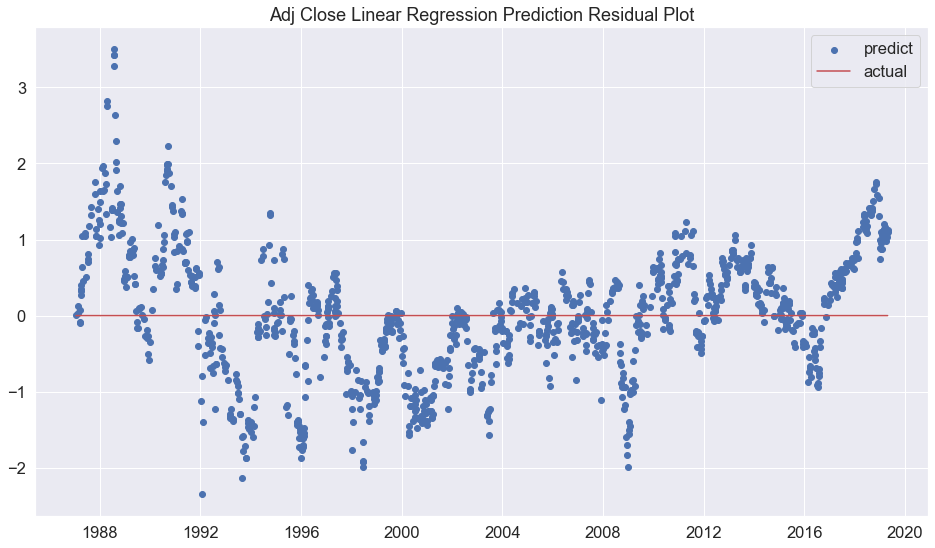

Mean Squared Error: 0.6739691343764631
R-score:  0.8944411871024072


In [151]:
train_SVM_model(X,y)

### SVM w PCA

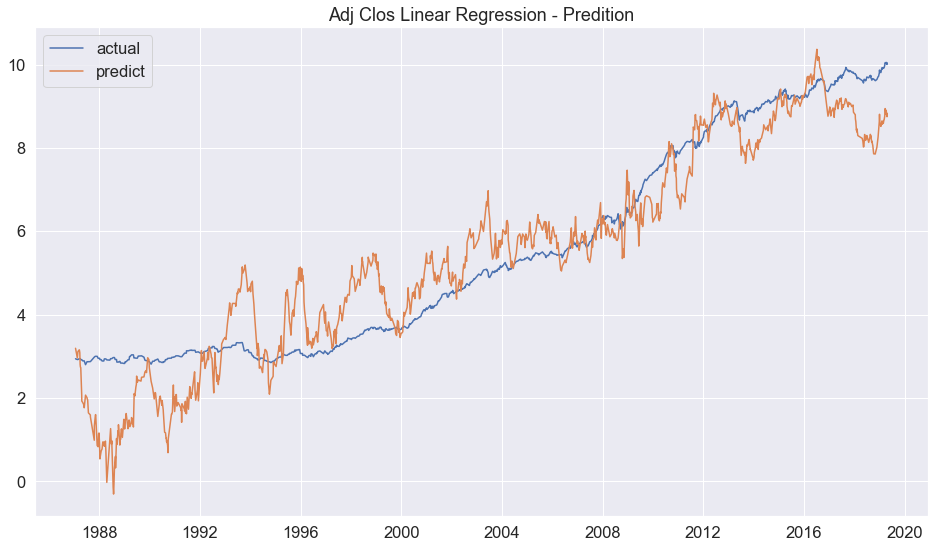

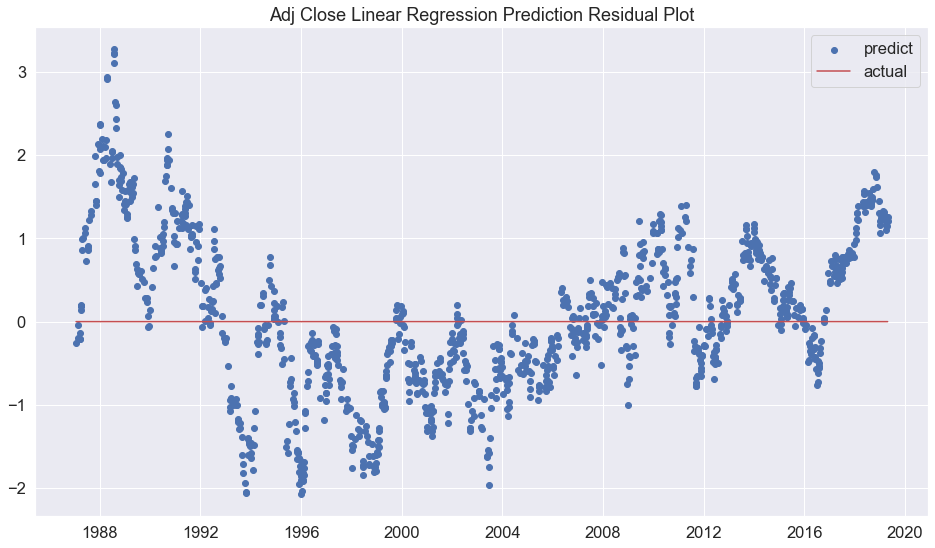

Mean Squared Error: 0.8862103201084125
R-score:  0.8611994161204621


In [152]:
train_SVM_model(X_pca,y)

## Part 4: Conclusions

```
From our findings, we discovered that using principal component analysis (PCA) can actually decrease the accuracy of a model. This is because PCA reduces the number of dimensions that contain crucial information, leading to information loss. On the other hand, reducing the dimensionality of the data through PCA can result in faster model execution with fewer features or components.
```

## Part 5: Appendix

In [ ]:
print("My name is Saranpat Prasertthum")
print("My NetID is: 655667271")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")